In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
video_game = pd.read_csv("Game sales files/Video_Games_Sales_as_at_22_Dec_2016.csv")
xbox1 = pd.read_csv("Game sales files/Xbox One Sales.csv")
ps4 = pd.read_csv("Game sales files/PS4 Sales.csv")


In [3]:
video_gameworatings = video_game[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
video_gameworatings.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
ps4['Platform'] = 'PS4'
ps4 = ps4.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
ps4 = ps4[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
ps4.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS4,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,PS4,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,PS4,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,PS4,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
xbox1['Platform'] = 'Xbox One'
xbox1 = xbox1.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
xbox1 = xbox1[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
xbox1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,Xbox One,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,Call of Duty: Black Ops 3,Xbox One,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,Call of Duty: WWII,Xbox One,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,Red Dead Redemption 2,Xbox One,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,MineCraft,Xbox One,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [6]:
dataframes = [video_gameworatings, ps4, xbox1]
mergeddata = pd.concat(dataframes)
mergeddata = mergeddata.loc[mergeddata['Year_of_Release']<=2016]
mergeddata

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
590,Alekhine's Gun,Xbox One,2016.0,Action,Maximum Games,0.00,0.00,0.00,0.00,0.00
593,Super Dungeon Bros,Xbox One,2016.0,Action,Wired Productions,0.00,0.00,0.00,0.00,0.00
594,Pro Cycling Manager 2016,Xbox One,2016.0,Sports,Focus Home Interactive,0.00,0.00,0.00,0.00,0.00
599,We Sing (2016),Xbox One,2016.0,Music,THQ Nordic,0.00,0.00,0.00,0.00,0.00


In [7]:
publisher_count = mergeddata.groupby('Publisher')['Year_of_Release'].count()
publisher_info = pd.DataFrame(publisher_count)
publisher_info = publisher_info.rename(columns={'Year_of_Release': '# of Games Released'})
publisher_info = publisher_info.reset_index()
publisher_total_NA = mergeddata.groupby('Publisher')['NA_Sales'].sum()
publisher_total_EU = mergeddata.groupby('Publisher')['EU_Sales'].sum()
publisher_total_JP = mergeddata.groupby('Publisher')['JP_Sales'].sum()
publisher_total_Other = mergeddata.groupby('Publisher')['Other_Sales'].sum()
publisher_total_Global = mergeddata.groupby('Publisher')['Global_Sales'].sum()
publisher_info = pd.merge(publisher_info, publisher_total_NA, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_EU, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_JP, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Other, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Global, on = "Publisher")
publisher_info.sort_values(by='Global_Sales', ascending = False).head(20)

,Publisher,# of Games Released,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
386,Nintendo,700,815.86,418.58,457.74,94.55,1786.72
150,Electronic Arts,1375,616.82,402.08,15.63,136.10,1170.91
25,Activision,1028,467.90,242.01,7.79,86.05,803.83
491,Sony Computer Entertainment,710,282.12,204.36,75.79,86.34,648.53
573,Ubisoft,1000,278.56,191.72,8.68,57.94,537.09
534,Take-Two Interactive,423,223.69,119.95,5.93,55.95,405.50
527,THQ,712,207.55,93.66,5.01,31.87,338.11
296,Konami Digital Entertainment,840,91.30,71.74,92.48,30.63,286.35
373,Namco Bandai Games,984,78.27,50.21,130.51,17.44,276.54
479,Sega,641,109.29,81.36,57.30,24.04,272.20


In [8]:
def  stats(a, b):
    quartilesval = a.quantile([.25, .5, .75])
    lowerq = quartilesval[.25]
    upperq = quartilesval[.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (iqr*1.5)
    upperbound = upperq + (iqr*1.5)
    upperoutliers = b.loc[a >= upperbound]
    loweroutliers = b.loc[a <= lowerbound]
    outliers=pd.concat([upperoutliers, loweroutliers])
    print(f'The statistical analysis states that there are {len(outliers)} outliers')
    print(f'the upper bound is {upperbound} and the lower bound is {lowerbound}')
    

def linearregress(x,y,a,b):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
    plt.scatter(x,y, color='blue')
    plt.plot(x,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(a,b),fontsize=15, color='red')
    plt.grid()
    
    
   

The statistical analysis states that there are 91 outliers
the upper bound is 3.9287500000000017 and the lower bound is -2.261250000000001
The r-square is 0.8078174644284765
y=0.72x+-4.61


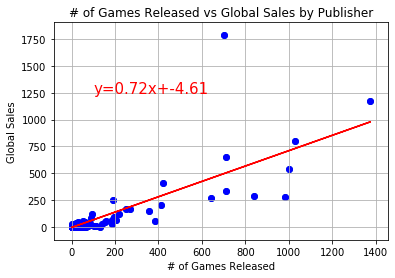

In [9]:
x_release = publisher_info['# of Games Released']
y_global_sales = publisher_info['Global_Sales']
plt.scatter(x_release,y_global_sales)
stats(publisher_info['Global_Sales'], publisher_info)
plt.xlabel('# of Games Released')
plt.ylabel('Global Sales')
plt.title('# of Games Released vs Global Sales by Publisher')
linearregress(x_release, y_global_sales, 100, 1250)


In [10]:
mergeddata.sort_values(by="Global_Sales", ascending = False).head(40)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [11]:
# Sort data for most popular genre based on global sales
genre_count = mergeddata.groupby('Genre')['Global_Sales'].count()
genre_info = pd.DataFrame(genre_count)
genre_info = genre_info.rename(columns = {"Global_Sales" : "# of Games per Genre"})
genre_info = genre_info.reset_index()
genre_total_NA = mergeddata.groupby('Genre')['NA_Sales'].sum()
genre_total_EU = mergeddata.groupby('Genre')['EU_Sales'].sum()
genre_total_JP = mergeddata.groupby('Genre')['JP_Sales'].sum()
genre_total_Other = mergeddata.groupby('Genre')['Other_Sales'].sum()
genre_total_Global = mergeddata.groupby('Genre')['Global_Sales'].sum()
genre_info = pd.merge(genre_info, genre_total_NA, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_EU, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_JP, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_Other, on = "Genre")
genre_info = pd.merge(genre_info, genre_total_Global, on = "Genre")
genre_info

,Genre,# of Games per Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,3513,916.57,562.02,165.39,199.37,1844.53
1,Action-Adventure,49,18.29,21.13,1.19,6.76,47.31
2,Adventure,1350,106.81,69.17,53.61,18.22,247.93
3,Fighting,868,228.61,103.79,88.38,38.17,458.93
4,MMO,5,1.95,1.69,0.14,0.60,4.39
5,Misc,1787,407.66,218.41,107.81,75.48,809.98
6,Music,24,5.27,2.06,0.04,1.17,8.55
7,Platform,908,448.70,204.34,131.24,52.70,837.31
8,Puzzle,581,121.52,49.98,56.68,12.43,241.02
9,Racing,1276,366.80,249.46,57.07,78.91,752.46


<function matplotlib.pyplot.show(*args, **kw)>

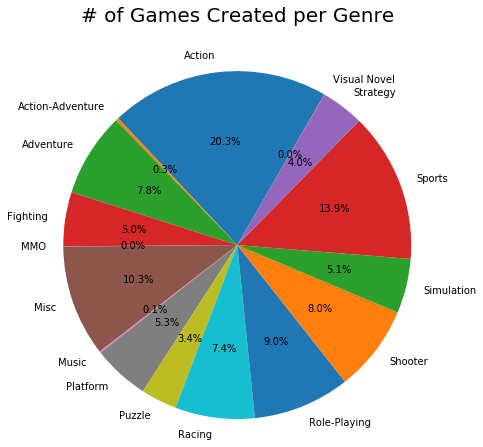

In [12]:
# genre_vs_region = genre_info.loc[genre_info["Global_Sales_x"].idxmax()]
# genre_vs_region

# Graph for amount of games created per genre

y=genre_info['# of Games per Genre']
labels = genre_info['Genre']
plt.pie(y, labels=labels, autopct='%1.1f%%', radius = 2, startangle = 60)
plt.title("# of Games Created per Genre", y=1.5, fontsize = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

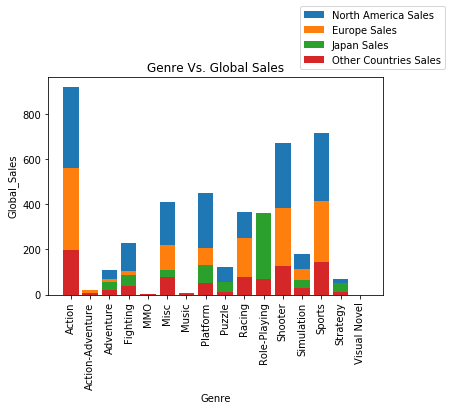

In [13]:
# Graph for Genre Vs. Sales 
ind = np.arange(len(labels))
NA_Sales = genre_info["NA_Sales"]
EU_Sales = genre_info["EU_Sales"]
JP_Sales = genre_info["JP_Sales"]
Other_Sales = genre_info["Other_Sales"]
p1 = plt.bar(ind, NA_Sales)
p2 = plt.bar(ind, EU_Sales)
p3 = plt.bar(ind, JP_Sales)
p4 = plt.bar(ind, Other_Sales)

plt.ylabel("Global_Sales")
plt.xlabel("Genre")
plt.title("Genre Vs. Global Sales")
plt.xticks(ind, labels, rotation = 90)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('North America Sales', 'Europe Sales', 'Japan Sales', 'Other Countries Sales'), bbox_to_anchor=(1.2,1.18), loc = 'right')
plt.show

In [14]:
na_sales_title = mergeddata[mergeddata["NA_Sales"] == mergeddata['NA_Sales'].max()]["Name"][0]
eu_sales_title = mergeddata[mergeddata["EU_Sales"] == mergeddata['EU_Sales'].max()]["Name"][0]
jp_sales_title = mergeddata[mergeddata["JP_Sales"] == mergeddata['JP_Sales'].max()]["Name"]
other_sales_title = mergeddata[mergeddata["Other_Sales"] == mergeddata['Other_Sales'].max()]["Name"]


# New data Frame fro best seller
best_seller_data = pd.DataFrame({'North America Best Seller': [na_sales_title],
                                 'Europe Best Seller': [eu_sales_title],
                                 'Japan Best Seller': [jp_sales_title],
                                 'Rest of the World Best Seller': [other_sales_title]})
best_seller_data


,North America Best Seller,Europe Best Seller,Japan Best Seller,Rest of the World Best Seller
0,Wii Sports,Wii Sports,"4 Pokemon Red/Pokemon Blue Name: Name, dtyp...",17 Grand Theft Auto: San Andreas Name: Name...


Not sure if this can be used but added

Text(0, 0.5, 'Game Sales in MM')

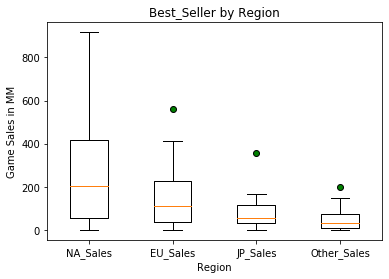

In [21]:
best_seller_data= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
flierprops = dict(markerfacecolor='green')
plt.boxplot([NA_Sales, EU_Sales, JP_Sales, Other_Sales], flierprops=flierprops, labels=best_seller_data)
plt.title("Best_Seller by Region")
plt.xlabel("Region")
plt.ylabel("Game Sales in MM")
